# Alucar - Analisando as Vendas

In [1]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data_path = '../data/'

In [3]:
alucar = pd.read_csv(f'{data_path}alucar.csv')

In [4]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [5]:
alucar.shape

(24, 2)

In [6]:
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 516.0+ bytes


In [7]:
alucar.mes = pd.to_datetime(alucar.mes)
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

<Axes: xlabel='mes', ylabel='vendas'>

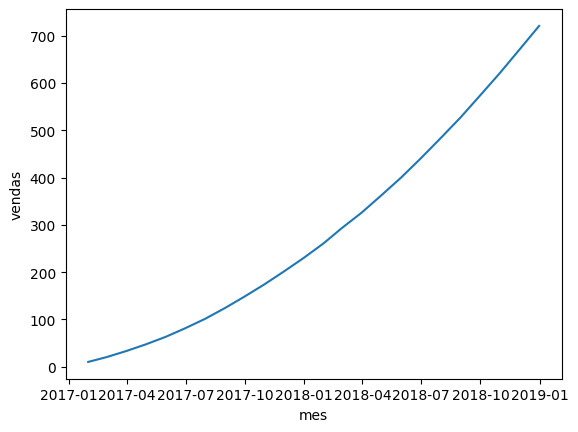

In [8]:
sns.lineplot(x='mes', y='vendas', data=alucar)

In [9]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", palette='dark', rc=custom_params)

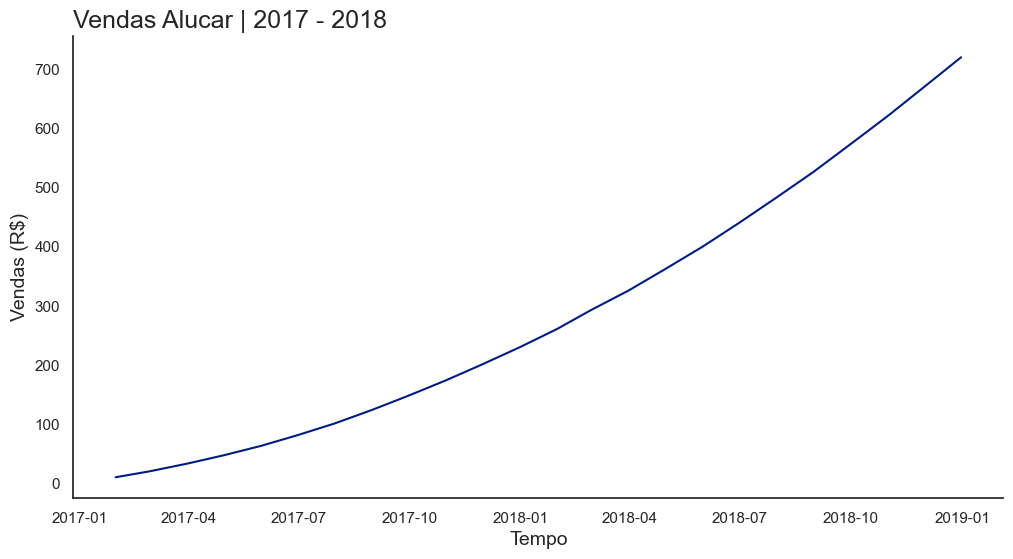

In [10]:
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar | 2017 - 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax=ax

In [11]:
alucar['aumento'] = alucar.vendas.diff()

In [12]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


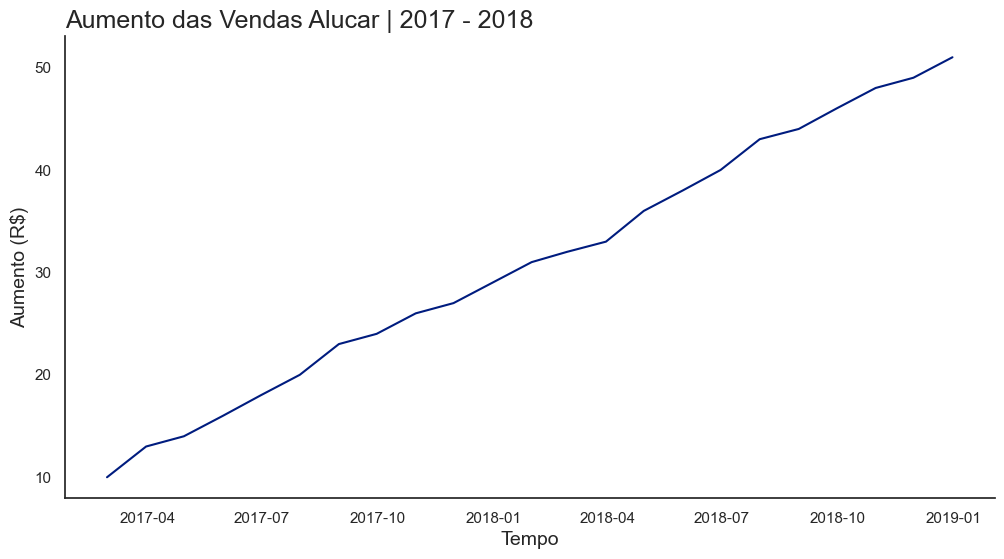

In [13]:
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das Vendas Alucar | 2017 - 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento (R$)', fontsize=14)
ax=ax

In [14]:
alucar['acc'] = alucar.aumento.diff()

In [15]:
alucar.head()

,mes,vendas,aumento,acc
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


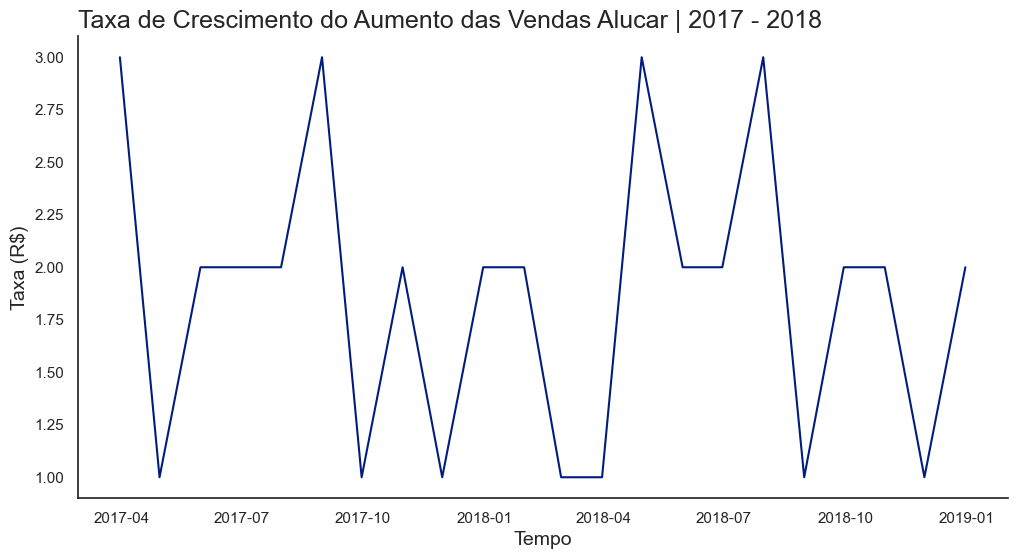

In [16]:
ax = sns.lineplot(x='mes', y='acc', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Taxa de Crescimento do Aumento das Vendas Alucar | 2017 - 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Taxa (R$)', fontsize=14)
ax=ax

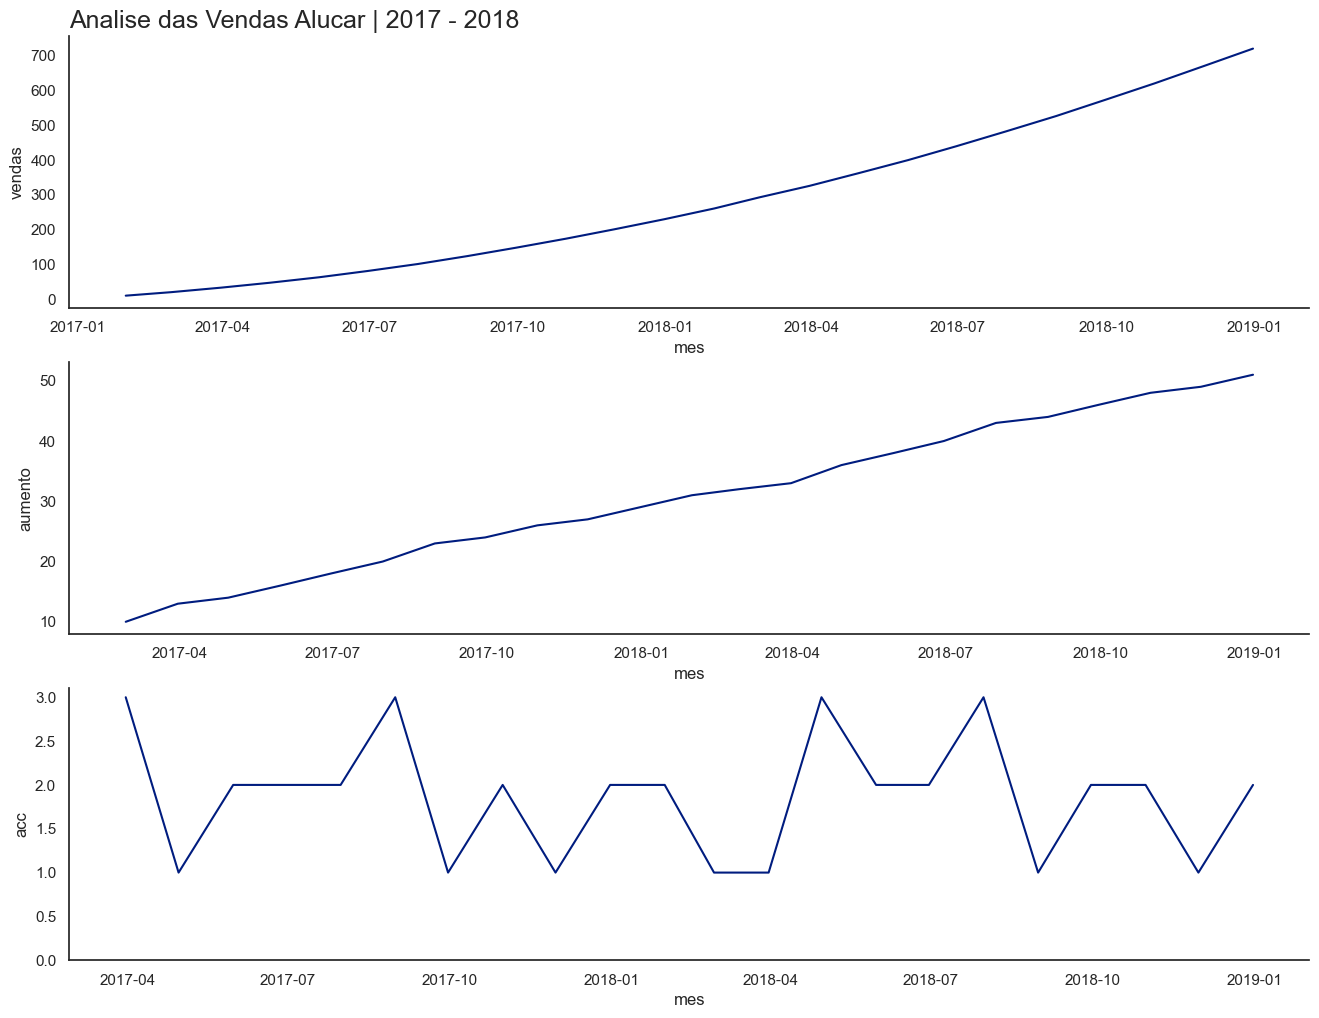

In [17]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Analise das Vendas Alucar | 2017 - 2018', loc='left', fontsize=18)
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax = plt.subplot(3,1,2)
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax = plt.subplot(3,1,3)
ax = sns.lineplot(x='mes', y='acc', data=alucar)
ax = plt.ylim(0)

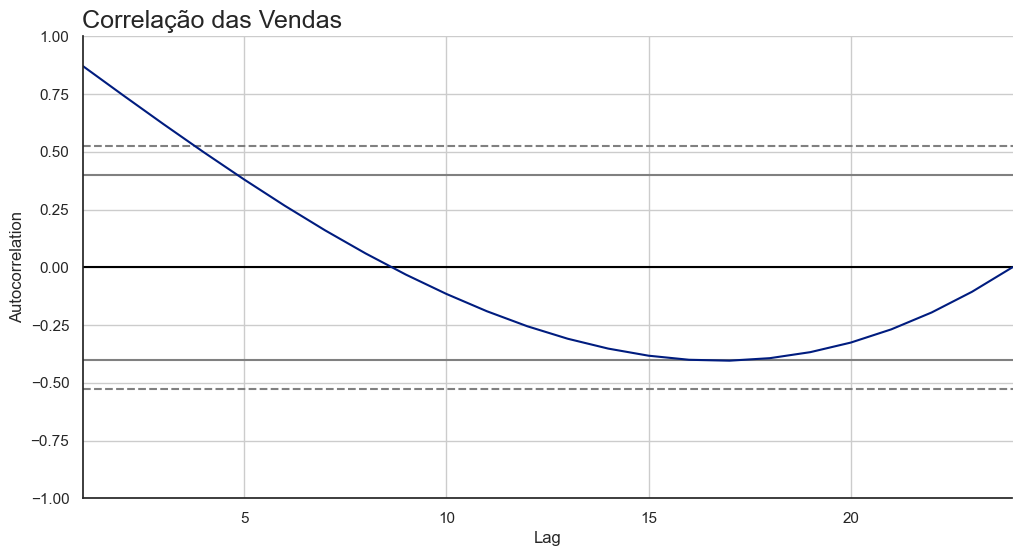

In [18]:
ax = autocorrelation_plot(alucar.vendas)
ax.set_title('Correlação das Vendas', loc='left', fontsize=18)
ax.figure.set_size_inches(12,6)

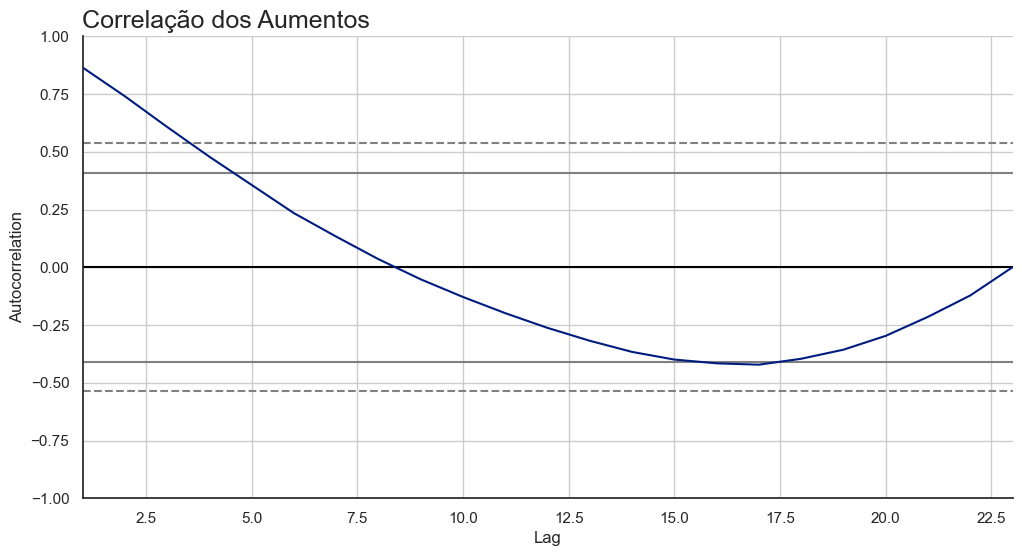

In [19]:
ax = autocorrelation_plot(alucar.aumento[1:])
ax.set_title('Correlação dos Aumentos', loc='left', fontsize=18)
ax.figure.set_size_inches(12,6)

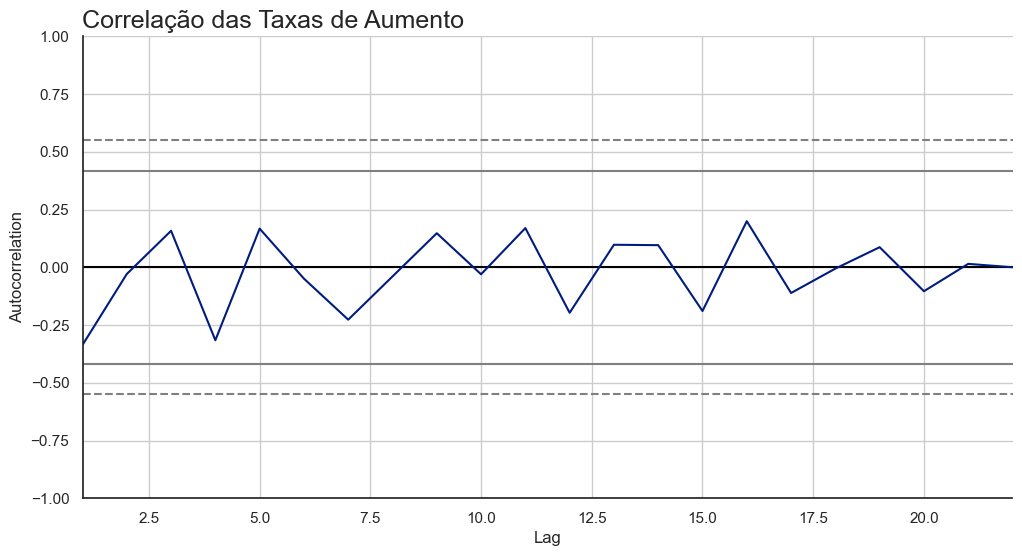

In [20]:
ax = autocorrelation_plot(alucar.acc[2:])
ax.set_title('Correlação das Taxas de Aumento', loc='left', fontsize=18)
ax.figure.set_size_inches(12,6)

In [21]:
alucar.head()

,mes,vendas,aumento,acc
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


# Alucar - Analisando os Assinantes da Newsletter

In [22]:
ass = pd.read_csv(f'{data_path}newsletter_alucar.csv')

In [23]:
ass.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [24]:
ass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mes         24 non-null     object
 1   assinantes  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 516.0+ bytes


In [25]:
ass.shape

(24, 2)

In [26]:
ass.mes = pd.to_datetime(ass.mes)
ass.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [27]:
ass['aumento'] = ass.assinantes.diff()
ass['acc'] = ass.aumento.diff()

In [28]:
ass.head()

,mes,assinantes,aumento,acc
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


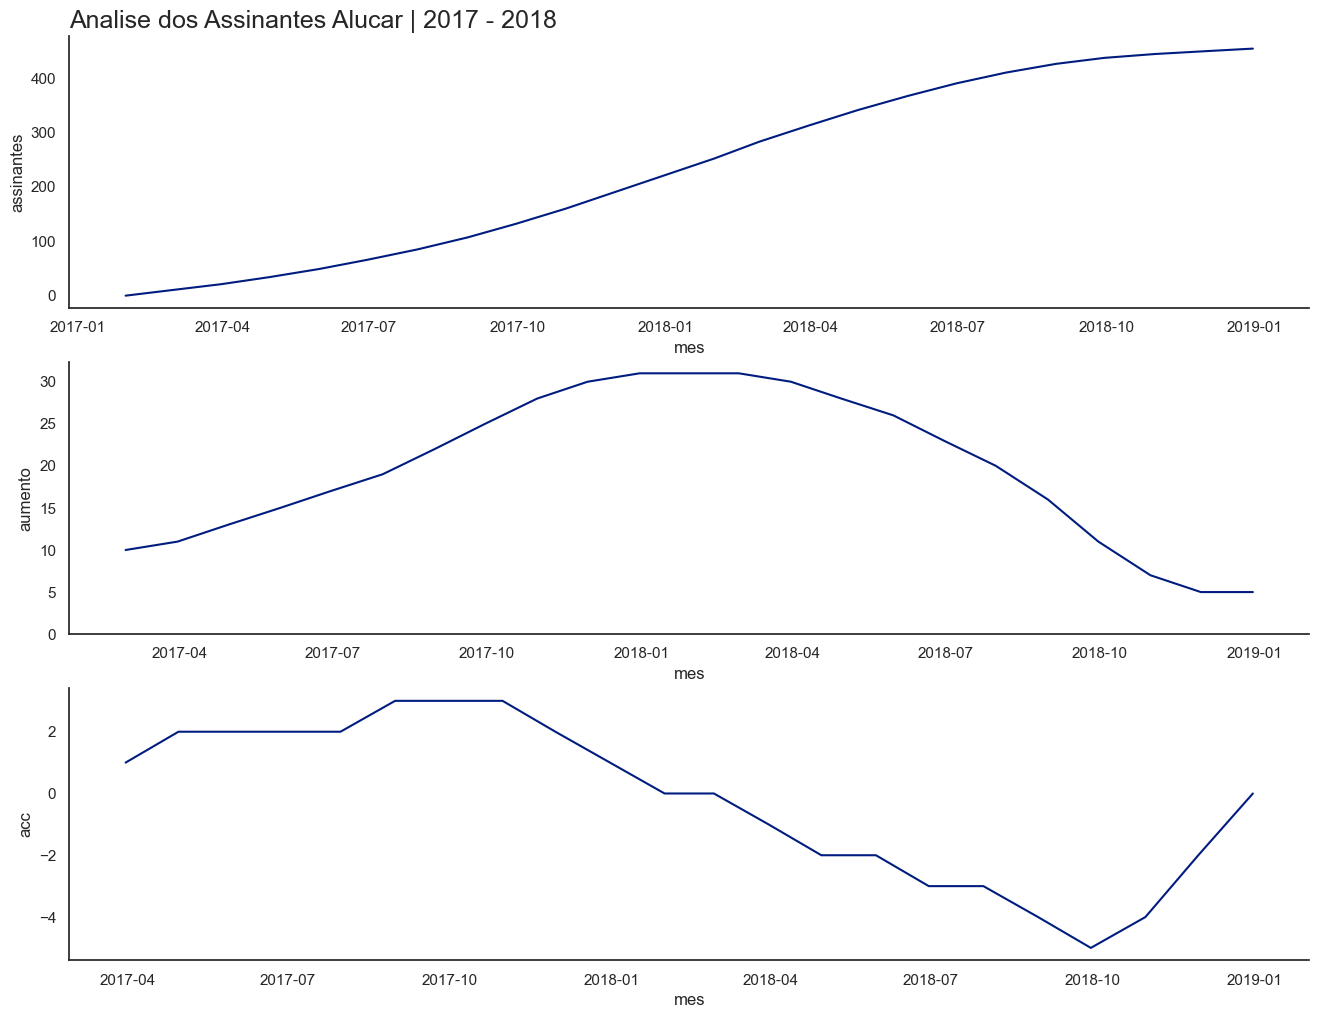

In [29]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Analise dos Assinantes Alucar | 2017 - 2018', loc='left', fontsize=18)
ax = sns.lineplot(x='mes', y='assinantes', data=ass)
ax = plt.subplot(3,1,2)
ax = sns.lineplot(x='mes', y='aumento', data=ass)
ax = plt.ylim(0)
ax = plt.subplot(3,1,3)
ax = sns.lineplot(x='mes', y='acc', data=ass)

# Chocolura - Analisando as Vendas

In [30]:
choco = pd.read_csv(f'{data_path}chocolura.csv')

In [31]:
choco.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [32]:
choco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 516.0+ bytes


In [33]:
choco.shape

(24, 2)

In [34]:
choco.mes = pd.to_datetime(choco.mes)
choco.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [35]:
choco['aumento'] = choco.vendas.diff()
choco['acc'] = choco.aumento.diff()

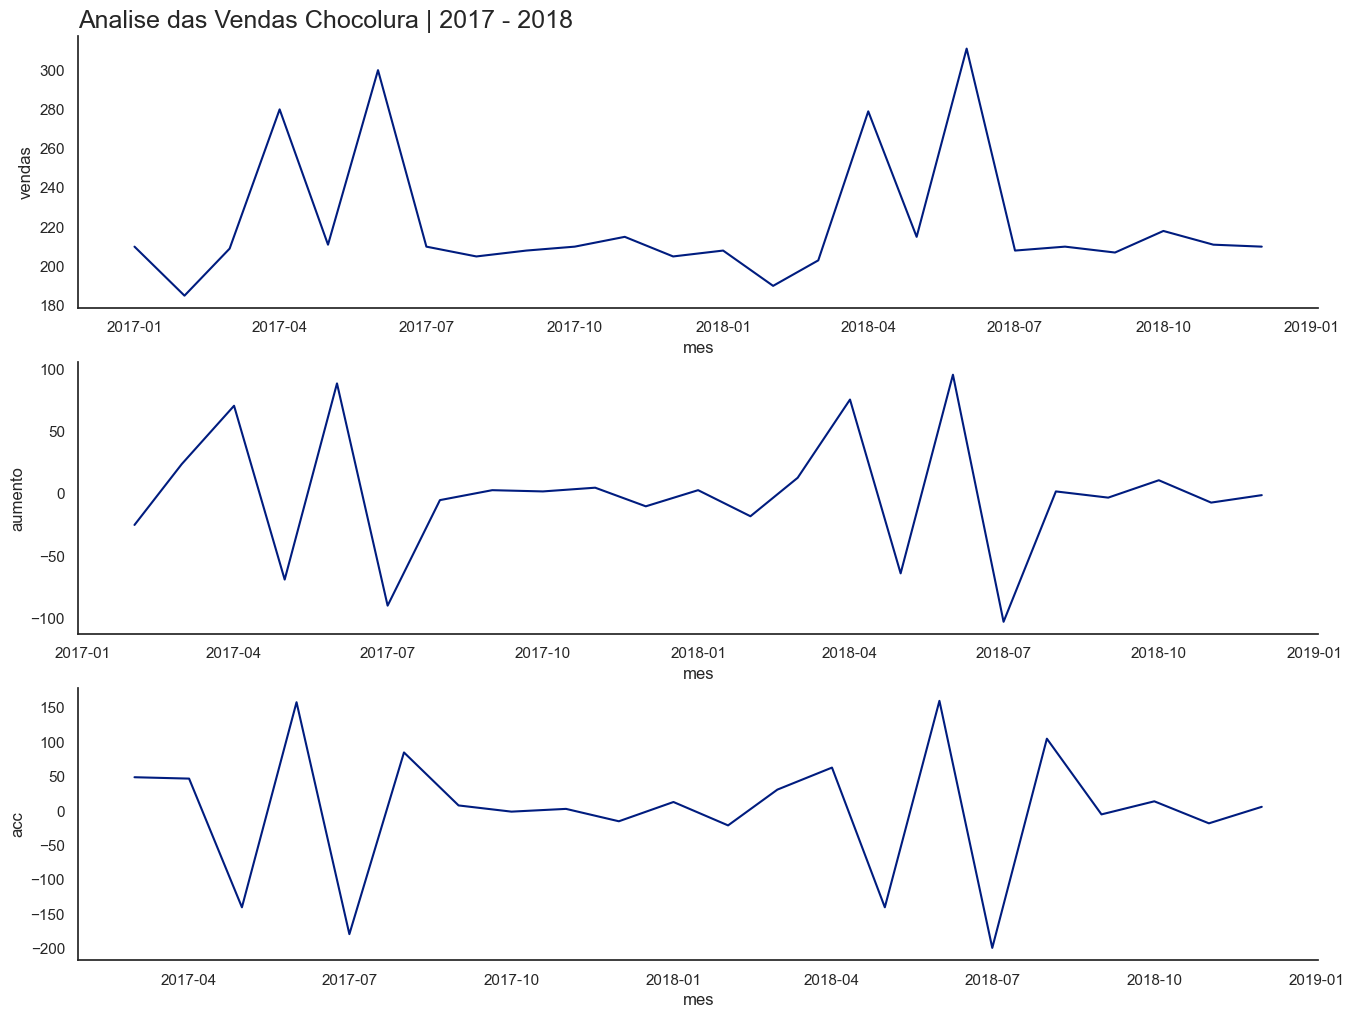

In [36]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Analise das Vendas Chocolura | 2017 - 2018', loc='left', fontsize=18)
ax = sns.lineplot(x='mes', y='vendas', data=choco)
ax = plt.subplot(3,1,2)
ax = sns.lineplot(x='mes', y='aumento', data=choco)
ax = plt.subplot(3,1,3)
ax = sns.lineplot(x='mes', y='acc', data=choco)

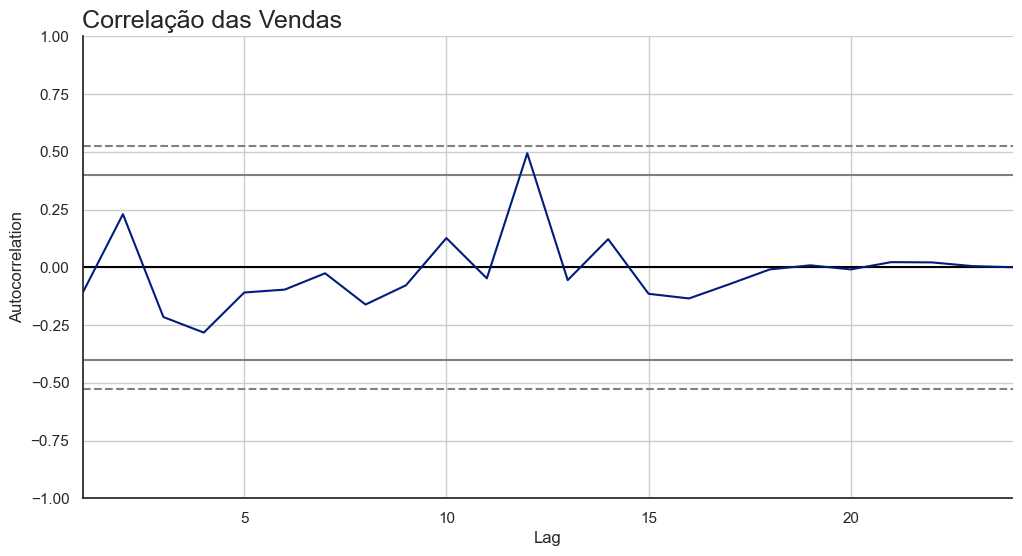

In [37]:
ax = autocorrelation_plot(choco.vendas)
ax.set_title('Correlação das Vendas', loc='left', fontsize=18)
ax.figure.set_size_inches(12,6)

# Chocolura - Vendas Diarias (Out-Nov)

In [38]:
vd = pd.read_csv(f'{data_path}vendas_por_dia.csv')

In [39]:
vd.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [40]:
vd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dia     61 non-null     object
 1   vendas  61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [41]:
vd.shape

(61, 2)

In [42]:
vd.dia = pd.to_datetime(vd.dia)
vd.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [43]:
vd['aumento'] = vd.vendas.diff()
vd['acc'] = vd.aumento.diff()

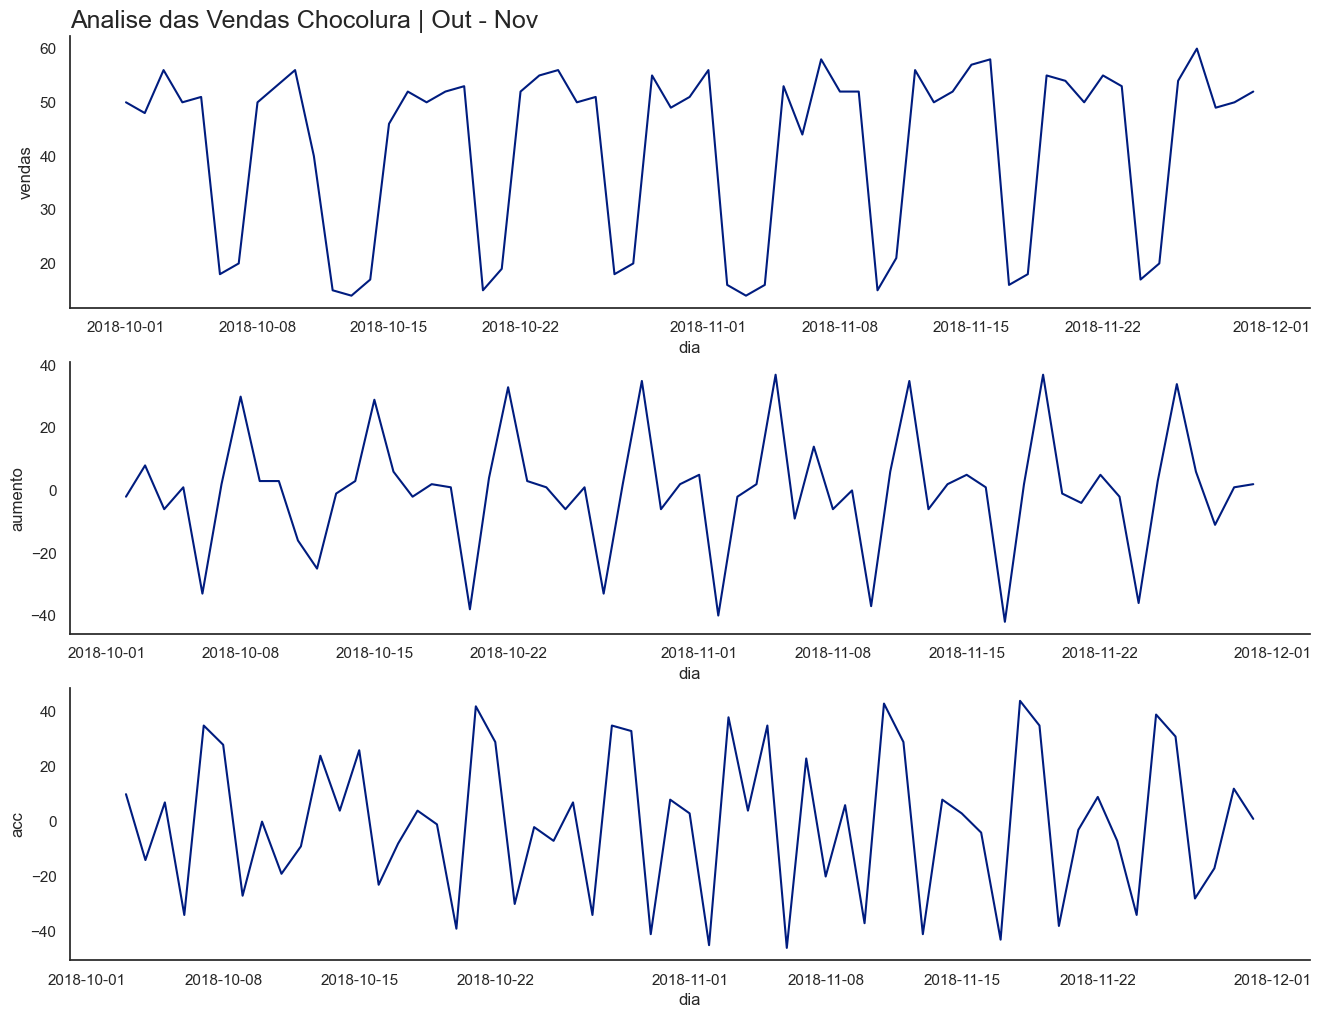

In [44]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Analise das Vendas Chocolura | Out - Nov', loc='left', fontsize=18)
ax = sns.lineplot(x='dia', y='vendas', data=vd)
ax = plt.subplot(3,1,2)
ax = sns.lineplot(x='dia', y='aumento', data=vd)
ax = plt.subplot(3,1,3)
ax = sns.lineplot(x='dia', y='acc', data=vd)

## Analisando a Sazonalidade

In [45]:
vd['weekday'] = vd.dia.dt.day_name()

In [46]:
vd.head(14)

,dia,vendas,aumento,acc,weekday
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday
7,2018-10-08,50,30.0,28.0,Monday
8,2018-10-09,53,3.0,-27.0,Tuesday
9,2018-10-10,56,3.0,0.0,Wednesday


In [47]:
vd_groupWeekday = vd.iloc[:,1:].groupby(['weekday']).mean().round()

In [48]:
vd_groupWeekday = vd_groupWeekday.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'])
vd_groupWeekday

,vendas,aumento,acc
weekday,,,
Monday,52.0,34.0,31.0
Tuesday,52.0,-1.0,-34.0
Wednesday,53.0,1.0,2.0
Thursday,51.0,-2.0,-3.0
Friday,45.0,-7.0,-5.0
Saturday,16.0,-28.0,-20.0
Sunday,19.0,3.0,31.0


## Correlacao das Vendas Diarias

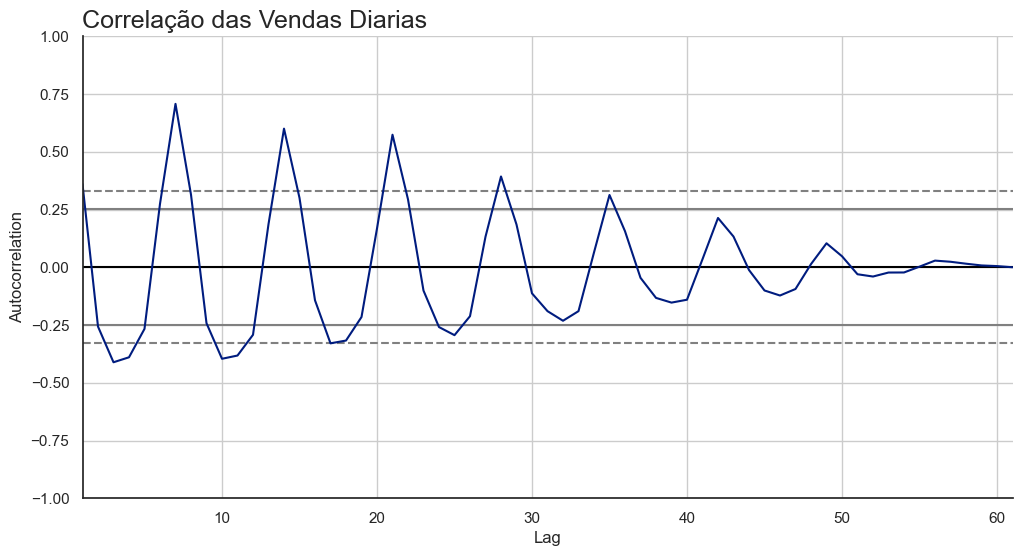

In [49]:
ax = autocorrelation_plot(vd.vendas)
ax.set_title('Correlação das Vendas Diarias', loc='left', fontsize=18)
ax.figure.set_size_inches(12,6)

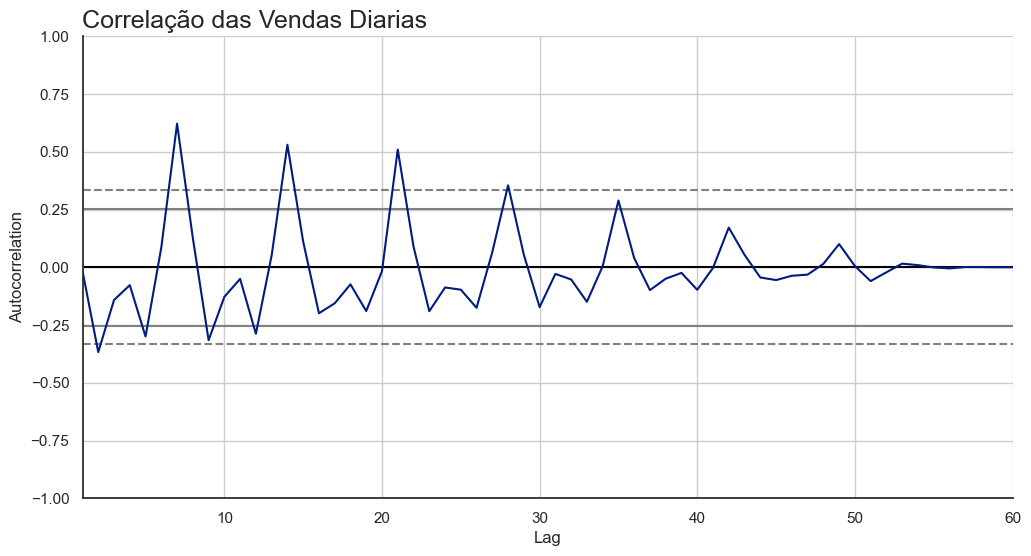

In [50]:
ax = autocorrelation_plot(vd.aumento[1:])
ax.set_title('Correlação das Vendas Diarias', loc='left', fontsize=18)
ax.figure.set_size_inches(12,6)

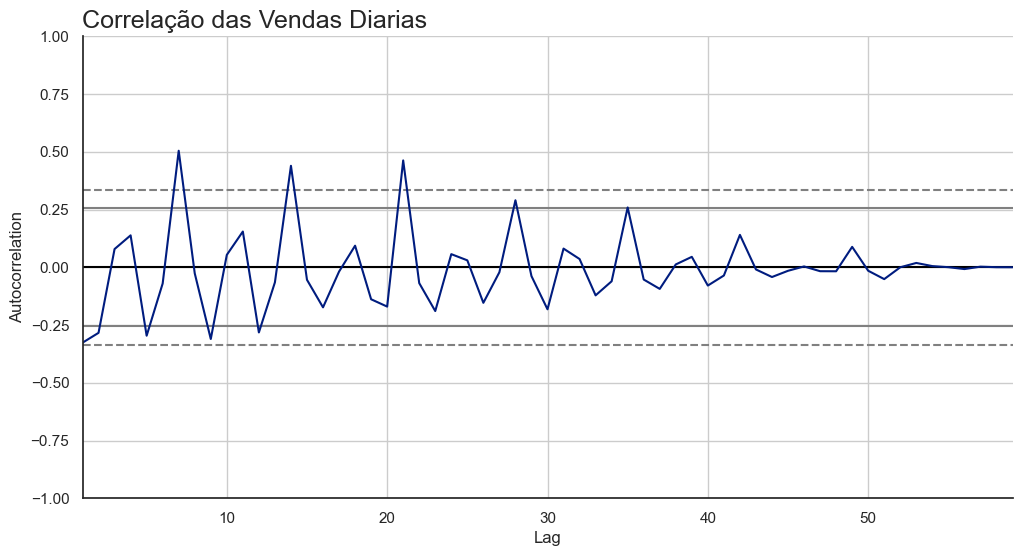

In [51]:
ax = autocorrelation_plot(vd.acc[2:])
ax.set_title('Correlação das Vendas Diarias', loc='left', fontsize=18)
ax.figure.set_size_inches(12,6)

# Cafelura - Analisando as Vendas

In [52]:
cafe = pd.read_csv(f'{data_path}cafelura.csv')

In [53]:
cafe.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [54]:
cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 516.0+ bytes


In [55]:
cafe.shape

(24, 2)

In [56]:
cafe.mes = pd.to_datetime(cafe.mes)
cafe.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [57]:
cafe['aumento'] = cafe.vendas.diff()
cafe['acc'] = cafe.aumento.diff()

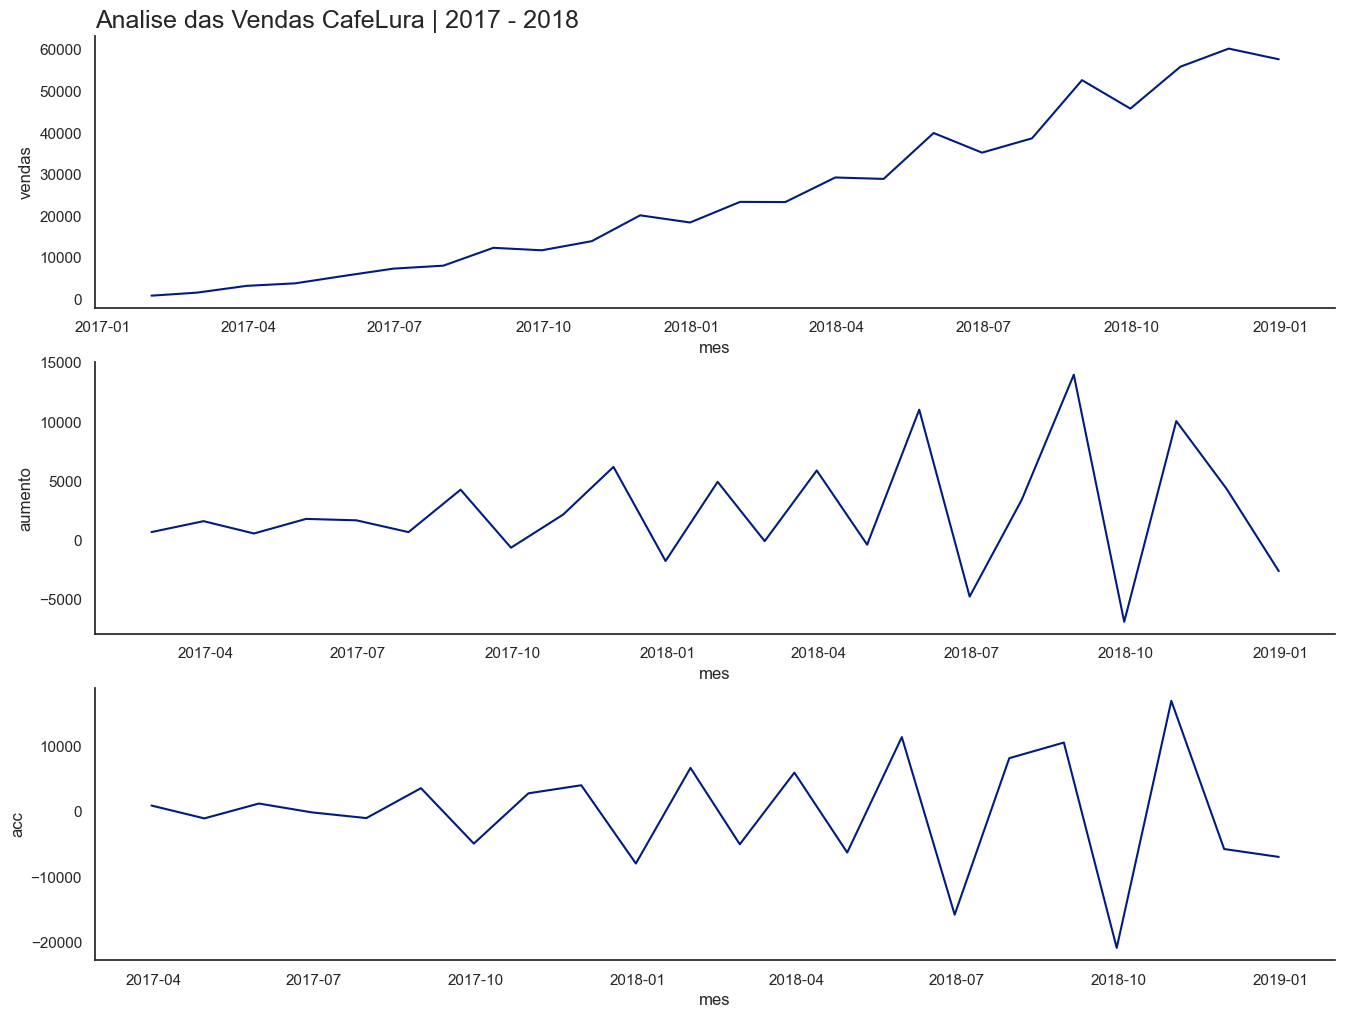

In [58]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Analise das Vendas CafeLura | 2017 - 2018', loc='left', fontsize=18)
ax = sns.lineplot(x='mes', y='vendas', data=cafe)
ax = plt.subplot(3,1,2)
ax = sns.lineplot(x='mes', y='aumento', data=cafe)
ax = plt.subplot(3,1,3)
ax = sns.lineplot(x='mes', y='acc', data=cafe)

In [59]:
fds = pd.read_csv(f'{data_path}dias_final_de_semana.csv')

In [60]:
fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [61]:
cafe['vendas_norm'] = cafe.vendas / fds.quantidade_de_dias.values

In [62]:
cafe.head()

,mes,vendas,aumento,acc,vendas_norm
0,2017-01-31,880,NaN,NaN,110.0
1,2017-02-28,1600,720.0,NaN,200.0
2,2017-03-31,3240,1640.0,920.0,324.0
3,2017-04-30,3840,600.0,-1040.0,480.0
4,2017-05-31,5670,1830.0,1230.0,630.0


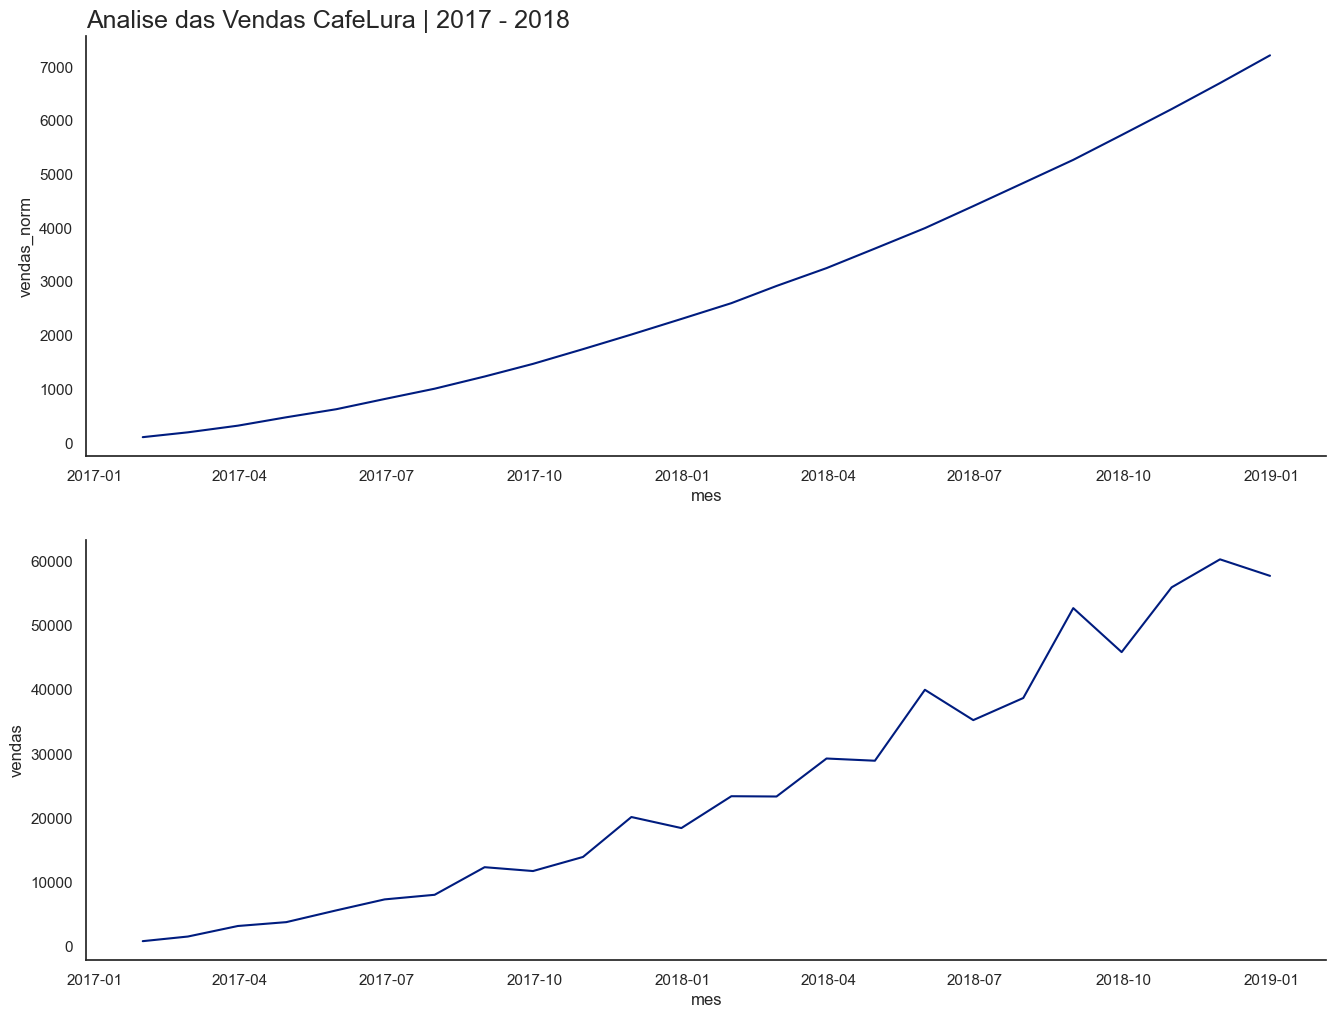

In [63]:
plt.figure(figsize=(16,12))
ax = plt.subplot(2,1,1)
ax.set_title('Analise das Vendas CafeLura | 2017 - 2018', loc='left', fontsize=18)
ax = sns.lineplot(x='mes', y='vendas_norm', data=cafe)
ax = plt.subplot(2,1,2)
ax = sns.lineplot(x='mes', y='vendas', data=cafe)

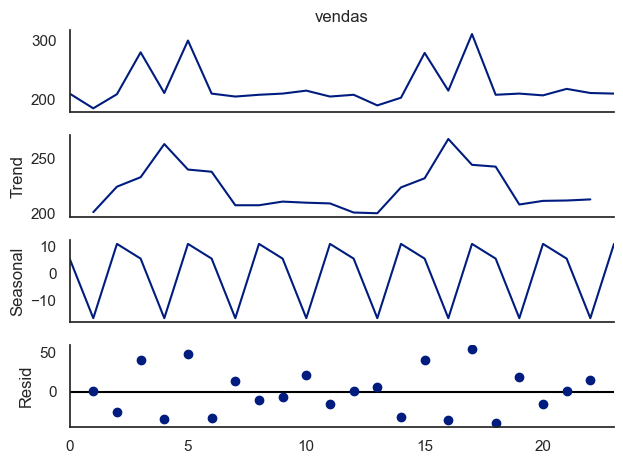

In [66]:
results = seasonal_decompose(choco.vendas, period=3)
ax = results.plot()

# Alucel - Analisando as Vendas

In [67]:
alucel = pd.read_csv(f'{data_path}alucel.csv')

In [68]:
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [69]:
alucel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dia     61 non-null     object 
 1   vendas  61 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [70]:
alucel.shape

(61, 2)

In [71]:
alucel.dia = pd.to_datetime(alucel.dia)
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [72]:
alucel['aumento'] = alucel.vendas.diff()
alucel['acc'] = alucel.aumento.diff()

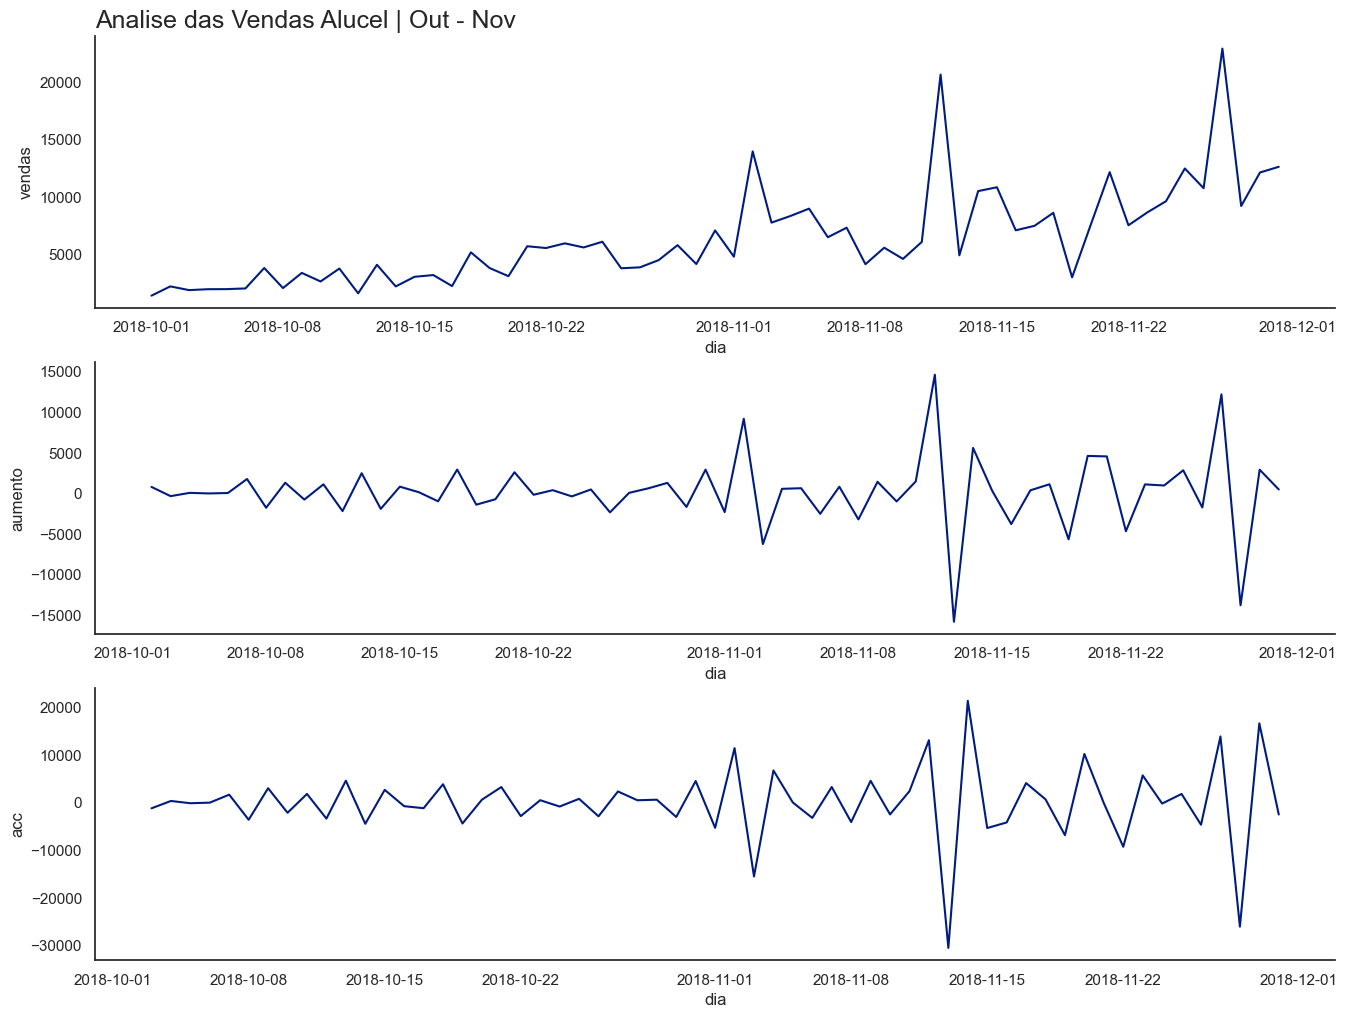

In [74]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Analise das Vendas Alucel | Out - Nov', loc='left', fontsize=18)
ax = sns.lineplot(x='dia', y='vendas', data=alucel)
ax = plt.subplot(3,1,2)
ax = sns.lineplot(x='dia', y='aumento', data=alucel)
ax = plt.subplot(3,1,3)
ax = sns.lineplot(x='dia', y='acc', data=alucel)

## Media Movel

In [75]:
alucel['media_movel'] = alucel.vendas.rolling(7).mean()

In [76]:
alucel.head(10)

,dia,vendas,aumento,acc,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


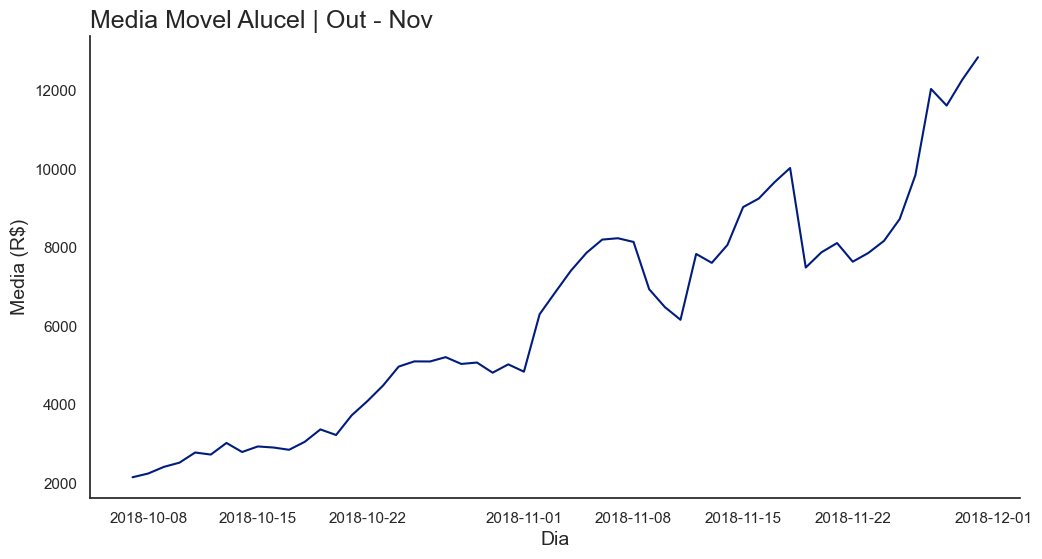

In [77]:
ax = sns.lineplot(x='dia', y='media_movel', data=alucel)
ax.figure.set_size_inches(12,6)
ax.set_title('Media Movel Alucel | Out - Nov', loc='left', fontsize=18)
ax.set_xlabel('Dia', fontsize=14)
ax.set_ylabel('Media (R$)', fontsize=14)
ax=ax